# <center> Airifi </center>

### Company Introduction: Company is an air purifier company. <br>

One of the leading Global pollution controller organizations.
The company is working its way for the betterment of the society by using advanced technologies to purify the air by removing harmful particles from the atmosphere.

# Problem Statement: 

- China is notorious for being a major polluter. Its economic growth in the past three decades has been the fastest among major nations, which is the main factor in why China has extensive air pollution.<br>
- China’s Environmental Sustainability Index is ranked near the bottom among countries worldwide.Air Pollution in Beijing is mainly dominated by coal combustion and vehicles running on the roads.<br>
- With this amplified wealth, individuals are more capable of affording motor vehicles. The number of motor vehicles on Beijing’s roads has doubled to 3.3 million with nearly 1200 added each day.<br>


# <center> Data Description </center>

<table>							
<th>	Column Name	</th>	<th>	Description	</th>		
<tr>	<td>	REF_NO	</td>	<td>	Index of rows	</td>	</tr>
<tr>	<td>	year	</td>	<td>	Contains the year in which the data was Recorded	</td>	</tr>
<tr>	<td>	month	</td>	<td>	Contains the month of the year in which the data was Recorded	</td>	</tr>
<tr>	<td>	day	</td>	<td>	Contains the day of the month in which the data was Recorded	</td>	</tr>
<tr>	<td>	hour	</td>	<td>	Contains at what hour of the day the data was Recorded	</td>	</tr>
<tr>	<td>	PM2.5	</td>	<td>	Atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers	</td>	</tr>
<tr>	<td>	PM10	</td>	<td>	Atmospheric particulate matter (PM) that have a diameter less than 10 micrometers	</td>	</tr>
<tr>	<td>	SO2	</td>	<td>	SO2 concentration (ug/m^3)	</td>	</tr>
<tr>	<td>	NO2	</td>	<td>	NO2 concentration (ug/m^3)	</td>	</tr>
<tr>	<td>	CO	</td>	<td>	CO concentration (ug/m^3)	</td>	</tr>
<tr>	<td>	O3	</td>	<td>	Ozone concentration (ug/m^3)	</td>	</tr>
<tr>	<td>	Temp	</td>	<td>	temperature (degree Celsius)	</td>	</tr>
<tr>	<td>	PRES	</td>	<td>	pressure (hPa)	</td>	</tr>
<tr>	<td>	DEWP	</td>	<td>	dew point temperature (degree Celsius)	</td>	</tr>
<tr>	<td>	RAIN	</td>	<td>	RAIN in (mm)	</td>	</tr>
<tr>	<td>	wd	</td>	<td>	wind direction	</td>	</tr>
<tr>	<td>	WSPM	</td>	<td>	wind speed (m/s)	</td>	</tr>
<tr>	<td>	station	</td>	<td>	name of the air-quality monitoring site	</td>	</tr>
</table>							


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train_data = pd.read_csv('beijing_train.csv')
train_data.shape

(403776, 18)

In [3]:
test_data = pd.read_csv('beijing_test.csv')
test_data.shape

(16728, 17)

In [4]:
train_data.head()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [6]:
train_data.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,16824.500000,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,9713.352953,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8412.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,16824.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,25236.250000,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
train_data.nunique()

REF_NO     33648
year           4
month         12
day           31
hour          24
PM2.5        866
PM10        1048
SO2          685
NO2         1209
CO           132
O3          1597
TEMP        1187
PRES         676
DEWP         645
RAIN         253
wd            16
WSPM         115
station       12
dtype: int64

# Profiling of Data

In [8]:
from pandas_profiling import profile_report
#PR = train_data.profile_report(title='PR_Airpollution')
#PR.to_file('PR_Airpollution.html')

# Dataset Information

- Number of variables	18
- Number of observations	403776
- Missing cells	71286

## Variable Types

- Numeric	15
- Categorical	3

## Dataset Information
- 1 REF_NO -  Index of Rows
- 2 year -  Data from 2013 to 2016 . No Missing Values 
- 3 month - Lesser Number of data for Month of January and February
- 4 Day - Day of the Month. No Missing Values
- 5 hour -  Hour of the Day. No Missing Values
- 6 PM2.5 - Target Variable. Missing Values 2.1% -  8475
- 7 PM10 -  Left Skewed . Missing Values - 1.5%
- 8 SO2 - Missing Values - 2% Left Skewed. Outliers. Range - 500
- 9 NO2 - Missing Values - 2.9%. Range - 290.Some Outliers
- 10 CO - Missing Values -  5%. Range -9900. Some Outliers
- 11 O3 - Missing Values -  3.2%. Range - 1070. Some Outliers
- 12 TEMP -  Missing Values - 0.1% Range - 61.5. Some Outliers
- 13 PRES - Missing Values - 0.1%. Range - 60.4. Noramally Distributed
- 14 DEWP - Missing Values - 0.1% Range -  72.5. 
- 15 Rain - Only 5% there was rain. 95% was not rain.
- 16 wd - Categorical Variable -  Wind Direction 1389 Missing Values 
- 17 WSPM - Missing - 0.1% , Slightly Left Skewed
- 18 Station - Cateogirical Variable - No Missing Values

# Data Pre Processing

### 1 -  Target Variable Missing Values  Not Accepted, hence needs to removed

In [9]:
train_data.isnull().sum()

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [10]:
train_data1 = train_data.copy()

In [11]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


In [12]:
train_data1.dropna(axis = 0,subset=['PM2.5'], inplace=True)

### 2 - Imputing other NA Values using Fill NA method (Median) and for categorical Variable Mode

In [13]:
MissinValues = (train_data1.columns[train_data1.isnull().sum()>0]).drop('wd')

In [14]:
for i in MissinValues:
    train_data1[i].fillna(train_data1[i].median(),inplace=True)

In [15]:
train_data1.isnull().sum()/len(train_data1)*100

REF_NO     0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      0.000000
PM10       0.000000
SO2        0.000000
NO2        0.000000
CO         0.000000
O3         0.000000
TEMP       0.000000
PRES       0.000000
DEWP       0.000000
RAIN       0.000000
wd         0.345559
WSPM       0.000000
station    0.000000
dtype: float64

In [16]:
train_data1['wd'].fillna(train_data1['wd'].mode()[0], inplace=True)# Filling Categorical Variable with type

In [17]:
train_data1.isnull().sum()/len(train_data1)*100

REF_NO     0.0
year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

In [18]:
train_data1.describe()

,REF_NO,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000,395301.000000
mean,16807.511489,2014.562604,6.731033,15.752821,11.488273,79.248275,104.404256,15.665208,50.296538,1204.065436,57.704713,14.045459,1010.312777,3.129933,0.066546,1.714839
std,9722.088626,1.098917,3.359932,8.804698,6.933325,79.146708,90.107065,21.626685,34.507541,1105.639912,56.762551,11.299262,10.348381,13.622556,0.834738,1.235945
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8360.000000,2014.000000,4.000000,8.000000,5.000000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.100000,0.000000,0.900000
50%,16822.000000,2015.000000,7.000000,16.000000,11.000000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.300000,1009.800000,4.100000,0.000000,1.400000
75%,25228.000000,2016.000000,10.000000,23.000000,18.000000,110.000000,145.000000,19.000000,70.000000,1500.000000,82.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,33648.000000,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [19]:

def remove_outlier(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)# Calculate quantile 1 using quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)# Calculate quantile 3
    IQR = Q3-Q1# Calculate IQR as difference of Quantile 3 and quantile 
    LowerBound = df_in[col_name].min()# Find the lower bound using the min() function
    UpperBound = Q3+1.5*IQR# Find the upper bound as quantile3 + 1.5*IQR
    print(LowerBound,UpperBound)# Print the lower and upper bound of the column
    df_out = df_in.loc[(df_in[col_name] >= LowerBound) & (df_in[col_name] <= UpperBound)]    # Remove the values lying outside min and upper bound range
    return df_out  


In [20]:
# Removing Outliers from PM10,SO2,NO2,CO,O3

In [21]:
# 1 - PM10
def log(train_data1):
    df_out = remove_outlier(train_data1,'PM10')# your code to remove the outlier from age
    return df_out
train_data1 = log(train_data1) 

#2 - SO2
def log(train_data1):
    df_out = remove_outlier(train_data1,'SO2')
    return df_out
train_data1 = log(train_data1) 

#3 - NO2
def log(train_data1):
    df_out = remove_outlier(train_data1,'NO2')
    return df_out
train_data1 = log(train_data1) 

#4 - CO
def log(train_data1):
    df_out = remove_outlier(train_data1,'CO')
    return df_out
train_data1 = log(train_data1) 

#5 - O3
def log(train_data1):
    df_out = remove_outlier(train_data1,'O3')
    return df_out
train_data1 = log(train_data1)



2.0 308.5
0.2856 42.0
1.0265 122.0
100.0 2250.0
0.2142 188.1615


# Feature Engineering

In [22]:
train_data1['Date'] = pd.to_datetime(train_data1[['year','month','day','hour']])

# EDA

In [23]:
train_data1.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'Date'],
      dtype='object')

In [24]:
train_data.groupby(['station'])['PM2.5'].mean()

station
Aotizhongxin     82.260952
Changping        70.716012
Dingling         65.887825
Dongsi           85.465989
Guanyuan         82.515756
Gucheng          83.110626
Huairou          69.427838
Nongzhanguan     84.129369
Shunyi           78.802831
Tiantan          81.479200
Wanliu           82.920469
Wanshouxigong    84.086340
Name: PM2.5, dtype: float64

### Q1 - Year on Year Average Main Parameters Description

In [25]:
train_data1.groupby(by='year').mean()

,REF_NO,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3704.055416,7.532034,16.140170,11.189953,59.008240,79.198546,11.480252,43.959312,867.923132,53.366555,16.103039,1007.566989,5.666737,0.067779,1.647432
2014,12009.378714,6.934710,15.257215,11.223309,57.974009,84.548546,10.111490,44.350117,824.765685,58.592417,15.635030,1009.575163,3.849819,0.057801,1.709647
2015,20492.518287,6.537159,15.781920,11.238873,52.544843,73.909554,7.792402,39.121768,806.592406,58.502523,14.657883,1010.533334,3.373861,0.091905,1.842970
2016,29168.704216,6.386912,15.971891,11.279140,51.061504,71.406435,6.904115,39.135506,802.611208,55.533142,14.185611,1011.157156,2.254714,0.090265,1.916656


### Insights -  Average of all the Parameters were highest in 2013 and started to drop YOY

### Q2 -  What was the Year on Year Average Station PM2.5

<AxesSubplot:xlabel='station'>

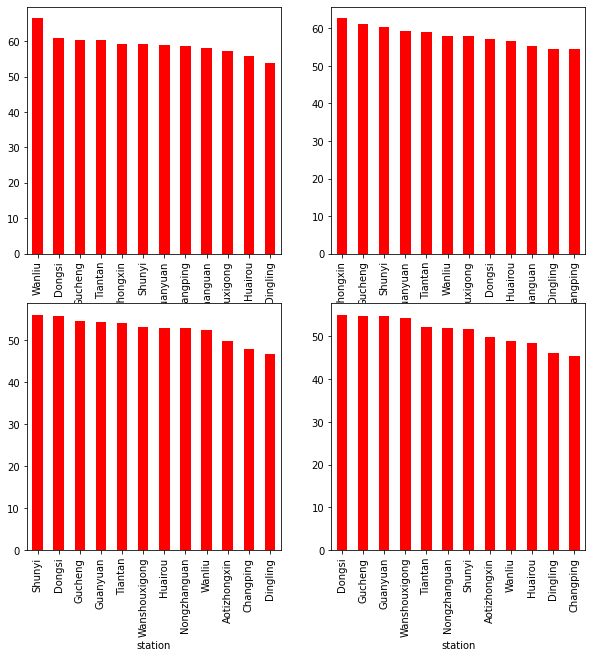

In [26]:
f,axes = plt.subplots(2,2,figsize=(10,10))
train_data1[(train_data1['year']==2013)].groupby(by='station').mean()['PM2.5'].sort_values(ascending=False).plot(kind='bar',color='red', ax=axes[0,0])
train_data1[(train_data1['year']==2014)].groupby(by='station').mean()['PM2.5'].sort_values(ascending=False).plot(kind='bar',color='red', ax=axes[0,1])
train_data1[(train_data1['year']==2015)].groupby(by='station').mean()['PM2.5'].sort_values(ascending=False).plot(kind='bar',color='red', ax=axes[1,0])
train_data1[(train_data1['year']==2016)].groupby(by='station').mean()['PM2.5'].sort_values(ascending=False).plot(kind='bar',color='red', ax=axes[1,1])

### Correlation of Target Variable with Other Variable

<AxesSubplot:>

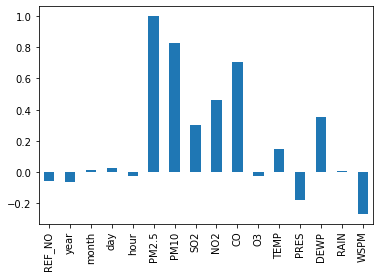

In [27]:
train_data1.corr()['PM2.5'].plot(kind='bar')

### Insights - PM10 has the positive coorelation followed by CO, NO2, SO2 and DEWP. WSPM and PRES has negative Correlation

### Q3 - Which month of the year has the highest PM2.5 concentration in the air ?

<AxesSubplot:xlabel='month'>

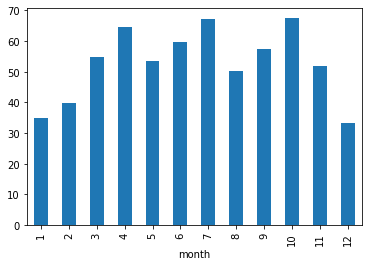

In [28]:
train_data1.groupby(by='month').mean()['PM2.5'].plot(kind='bar')

- Insights -  for the Month of July and October , PM2.5 has highest concentration in the air

### Q4 - Which time during the day is PM2.5 have highest release of PM2.5  in air

<AxesSubplot:xlabel='hour'>

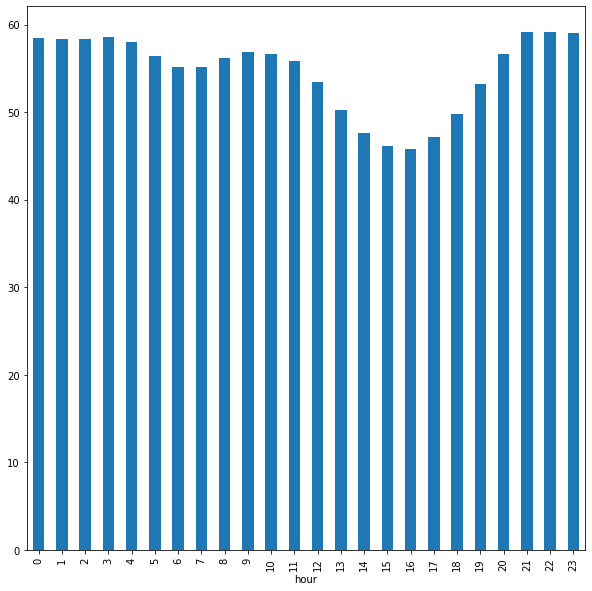

In [29]:
plt.figure(figsize=(10,10))
train_data1.groupby(by='hour').mean()['PM2.5'].plot(kind='bar')

### Insights - Highest PM2.5 can be seen emitted during late evening from 8:00 pm to 4:am in the morning

In [30]:
train_data1.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'Date'],
      dtype='object')

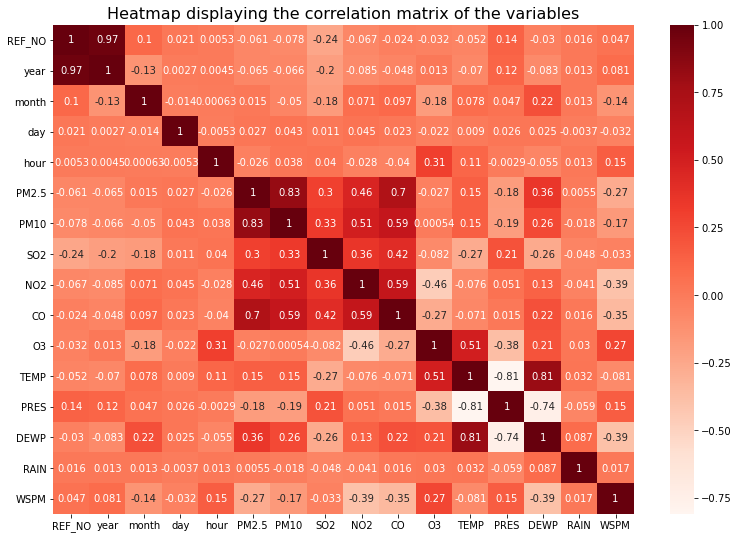

In [31]:
plt.figure(figsize=(13,9))
sns.heatmap(train_data1.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

### Issue of Multicollinearity in the data

1- Temp and DEWP - 0.81 since temperature has lowest coorelation with PM2.5 hence we can drop the same<br>
2 - Pres and DEWP - -0.71 since pres have lower coorelation with PM2.5. hence we can drop the same

In [171]:
train_data1.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'Date'],
      dtype='object')

### Dropping Unnecessary Columns

In [172]:
dropcols = ['REF_NO','year','month','day','hour','TEMP','PRES','station','Date']

In [173]:
train_data2 = train_data1.drop(dropcols,axis=1)

In [174]:
train_data2.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'wd',
       'WSPM'],
      dtype='object')

### Converting Non Numerical Columns to Numerical Columns

In [175]:
train_data2 = pd.get_dummies(train_data2,drop_first=True)

In [176]:
train_data2.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'WSPM',
       'wd_ENE', 'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW',
       'wd_S', 'wd_SE', 'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW',
       'wd_WSW'],
      dtype='object')

### Splitting X and y

In [177]:
X = train_data2.drop('PM2.5',axis=1)

In [178]:
y = train_data2['PM2.5']

## Scaling X Variable

In [179]:
from sklearn.preprocessing import StandardScaler

In [180]:
SS = StandardScaler()

In [181]:
X[X.columns] = SS.fit_transform(X)

In [182]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
PM10,307196.0,1.280081e-15,1.000002,-1.265414,-0.809687,-0.235809,0.574372,3.899490
SO2,307196.0,2.003291e-14,1.000002,-0.951115,-0.762136,-0.431445,0.340167,3.647075
NO2,307196.0,-1.271794e-14,1.000002,-1.562074,-0.790356,-0.133525,0.639217,3.111990
CO,307196.0,3.894916e-14,1.000002,-1.504065,-0.880175,-0.256285,0.575568,2.863165
O3,307196.0,-8.835933e-15,1.000002,-1.275364,-0.827749,-0.149057,0.574881,2.972927
DEWP,307196.0,-4.686547e-16,1.000002,-3.347589,-0.844574,0.158054,0.890470,1.807768
RAIN,307196.0,-3.914527e-15,1.000002,-0.086896,-0.086896,-0.086896,-0.086896,80.827057
WSPM,307196.0,-1.131205e-15,1.000002,-1.393190,-0.692048,-0.302524,0.398618,8.656513
wd_ENE,307196.0,-4.359209e-14,1.000002,-0.287479,-0.287479,-0.287479,-0.287479,3.478512
wd_ESE,307196.0,-1.257891e-13,1.000002,-0.240100,-0.240100,-0.240100,-0.240100,4.164929


# Importing and Running Linear Regression

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
LinReg = LinearRegression()

In [185]:
LinReg.fit(X,y)

LinearRegression()

In [186]:
PredValues = LinReg.predict(X)

In [187]:
LinReg.coef_

array([ 3.15616691e+01,  5.95281356e-01, -4.37173420e+00,  1.74791514e+01,
        5.40576319e-01,  6.09208181e+00, -1.23121919e-01, -1.38955970e+00,
       -4.52272304e-02,  3.61045115e-01,  7.08535037e-02,  1.12503956e-01,
        6.28377911e-03,  6.01085513e-02, -1.14722371e-01, -7.10994295e-02,
        5.15199005e-02,  1.19600844e-01, -1.44298336e-01, -6.19871663e-01,
       -5.61430917e-01, -3.16884824e-01, -4.41188156e-01])

In [188]:
LinReg.intercept_

54.86563529473041

### Model Evaluation using Root Mean Square

In [189]:
from sklearn.metrics import mean_squared_error,r2_score

In [190]:
mseval = mean_squared_error(y,PredValues)

In [191]:
mseval

572.6219918930045

In [195]:
RMSE = np.sqrt(mseval)

In [196]:
RMSE

23.929521346926364

# Final Steps of Test Data

In [198]:
test_data.head()

,REF_NO,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
1,33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
2,33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
3,33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
4,33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


In [200]:
dropcols_T = ['REF_NO','year','month','day','hour','TEMP','PRES','station']

In [201]:
X_test = test_data.drop(dropcols_T, axis=1)

## Converting Categorical wd into Numerical

In [203]:
X_test = pd.get_dummies(X_test, drop_first=True)

In [204]:
X_test.columns

Index(['PM10', 'SO2', 'NO2', 'CO', 'O3', 'DEWP', 'RAIN', 'WSPM', 'wd_ENE',
       'wd_ESE', 'wd_N', 'wd_NE', 'wd_NNE', 'wd_NNW', 'wd_NW', 'wd_S', 'wd_SE',
       'wd_SSE', 'wd_SSW', 'wd_SW', 'wd_W', 'wd_WNW', 'wd_WSW'],
      dtype='object')

## Scaling X

In [206]:
X_test[X_test.columns] = SS.transform(X_test)

In [207]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PM10,16728.0,0.569590,2.082336,-1.248535,-0.894081,-0.151415,1.283281,15.478326
SO2,16728.0,1.015980,2.127221,-0.872367,-0.431445,0.340167,1.773161,32.086491
NO2,16728.0,0.608241,1.617157,-1.524460,-0.790356,0.368757,1.643781,9.062102
CO,16728.0,1.583484,3.620604,-1.504065,-0.880175,0.159642,2.655201,19.084302
O3,16728.0,-0.376753,0.710340,-1.257587,-1.076603,-0.420534,0.167666,10.031324
DEWP,16728.0,-1.217994,0.453511,-2.515621,-1.591212,-1.185894,-0.837463,-0.197488
RAIN,16728.0,-0.084140,0.039983,-0.086896,-0.086896,-0.086896,-0.086896,1.140764
WSPM,16728.0,0.167582,1.096021,-1.393190,-0.536238,-0.146715,0.632332,7.955371
wd_ENE,16728.0,-0.090940,0.837603,-0.287479,-0.287479,-0.287479,-0.287479,3.478512
wd_ESE,16728.0,-0.104747,0.760229,-0.240100,-0.240100,-0.240100,-0.240100,4.164929


In [210]:
PredValues1 = pd.DataFrame(LinReg.predict(X_test))

In [216]:
PredValues1

,0
0,452.587347
1,462.040910
2,443.180832
3,409.396250
4,495.901605
...,...
16723,8.960288
16724,10.685214
16725,10.608719
16726,6.442641


In [218]:
FinalValue = pd.DataFrame(test_data['REF_NO'])

In [219]:
FinalValue

,REF_NO
0,33649
1,33650
2,33651
3,33652
4,33653
...,...
16723,35060
16724,35061
16725,35062
16726,35063


In [220]:
FinalValue['PredValues'] = PredValues1

In [221]:
FinalValue

,REF_NO,PredValues
0,33649,452.587347
1,33650,462.040910
2,33651,443.180832
3,33652,409.396250
4,33653,495.901605
...,...,...
16723,35060,8.960288
16724,35061,10.685214
16725,35062,10.608719
16726,35063,6.442641


In [224]:
FinalValue.to_csv('submission.csv', index=False, header=False)